<H6>Importing Necessary 
    Python libraries 

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline


<H6>Read in and Explore the Data

In [5]:
train_data= pd.read_csv("train.csv")

#train_data.describe(include="all")
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
train_data.info()

NameError: name 'train_data' is not defined

In [74]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [79]:

train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Frost, Mr. Anthony Wood ""Archie""",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [47]:
#train_data.info
print(train_data.columns.values)
#train_data.describe(include='all')

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


###### Data Analysis

The features in the dataset

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Finding the number of null values in each feature.
#pd.isnull(train_data).sum()
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


We have nulls in Age, Cabin and Embarked in the train dataset

General overview:
    There are 819 passengers in the train set
    Features by type
      Categorical
          Pclass: ordinal
          Sex
          Embarked
      Numeric
          Age: continuous
          Fare: continuous
          SibSp: discrete
          Parch: discrete
      Other
          Name
          Ticket
          Cabin
Missing data:
<list>
          1. The Age feature is missing approximately 19.9% of its values.I guess it is important for the survival so the missing data should be filled up .
          2. The Cabin feature is missing approximately 77% of its Values.It would be hard to fill in the missing data so it may be dropped
          3. The Embarked feature is missing 0.22% of its values.So its highly unlikely to affect the outcome of the result.

<H6> Data Visualization

Total number of passengers--------------- 
 male      577
female    314
Name: Sex, dtype: int64
Total passengers on Pclass------------
 3    491
1    216
2    184
Name: Pclass, dtype: int64
Total passengers on Pclass------------
 3    491
1    216
2    184
Name: Pclass, dtype: int64
---------------Number of passengers embarked--------------- 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


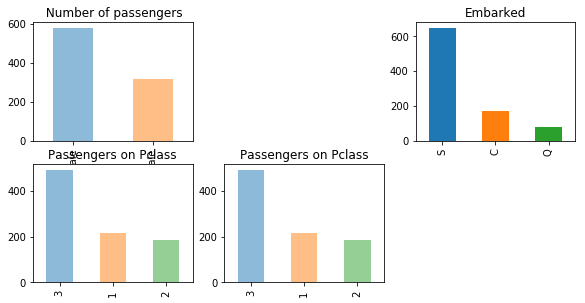

In [51]:
fig=plt.figure(figsize=(20,10))  #b(10,5)= (length,height)

plt.subplot2grid((4,6),(0,0))
plt.title(' Number of passengers')
print('Total number of passengers--------------- \n', train_data.Sex.value_counts())
train_data.Sex.value_counts().plot(kind="bar",alpha=0.5)  

plt.subplot2grid((4,6),(1,0))
plt.title('Passengers on Pclass')
print('Total passengers on Pclass------------\n',train_data.Pclass.value_counts())
train_data.Pclass.value_counts().plot(kind="bar",alpha=0.5)  

plt.subplot2grid((4,6),(1,1))
plt.title('Passengers on Pclass')
print('Total passengers on Pclass------------\n',train_data.Pclass.value_counts())
train_data.Pclass.value_counts().plot(kind="bar",alpha=0.5)  
train_data.Pclass.value_counts()


plt.subplot2grid((4,6),(0,2))
plt.title("Embarked")
print('---------------Number of passengers embarked--------------- \n',train_data.Embarked.value_counts())
train_data.Embarked.value_counts().plot(kind="bar",alpha=1)

### Survivours based on Gender

Percentage of male survivours 
 0    0.811092
1    0.188908
Name: Survived, dtype: float64
Percentage of Female survivours 
 1    0.742038
0    0.257962
Name: Survived, dtype: float64
Percentage of survivours 
 female    0.681287
male      0.318713
Name: Sex, dtype: float64


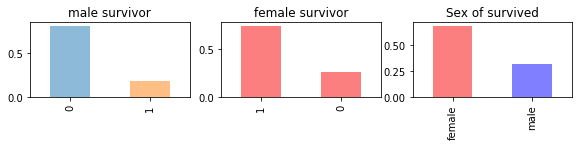

In [52]:
female_color="#FA0000"
fig=plt.figure(figsize=(20,8))  #b(10,5)= (length,height)

plt.subplot2grid((5,6),(0,0))
print('Percentage of male survivours \n',train_data.Survived[train_data.Sex=="male"].value_counts(normalize=True))
train_data.Survived[train_data.Sex=="male"].value_counts(normalize=True).plot(kind="bar",alpha=0.5) 
# alpha for the brightness of the color
plt.title("male survivor")

plt.subplot2grid((5,6),(0,1))
print('Percentage of Female survivours \n',train_data.Survived[train_data.Sex=="female"].value_counts(normalize=True))
train_data.Survived[train_data.Sex=="female"].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color=female_color)  # alpha for the brightness of the color
plt.title("female survivor")

plt.subplot2grid((5,6),(0,2))
print('Percentage of survivours \n',train_data.Sex[train_data.Survived==1].value_counts(normalize=True))
train_data.Sex[train_data.Survived==1].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color=[female_color,'b'])  # alpha for the brightness of the color
plt.title("Sex of survived")

plt.show()

### Suvival based on Age

Text(0,0.5,'Persons')

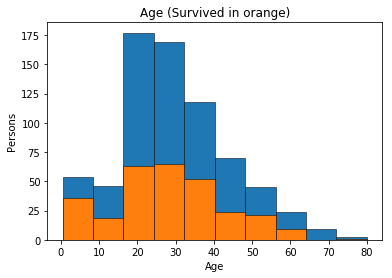

In [53]:
data = train_data
# data = pd.get_dummies(train_data, columns=['Sex'])
# Age of people
plt.title("Age (Survived in orange)")
data['Age'].plot.hist(edgecolor='black', linewidth=0.5)
data[data.Survived == 1]['Age'].plot.hist(edgecolor='black', linewidth=0.5)
plt.xlabel("Age")
plt.ylabel("Persons")

    The number of female survivours are  way higher than men. 

###  Survivours based on Pclass

Pclass: It has a negative correlation of -0.33 which means that increase in Pclass leads to decrease in Survived. We group the data by passing the Feature as an attribute to the groupby method.

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


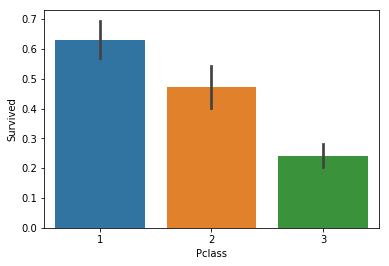

In [54]:
print(train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean())
sns.barplot(x="Pclass", y="Survived", data=train_data)

Rich men and women had more chance to survive than any other passengers

## Survivours based on Gender and Pclass

Percentage of  men who survived in Pclass=1: 36.885245901639344
Percentage of men who survived in Pclass=2: 15.74074074074074
Percentage of men who survived in Pclass=3: 13.544668587896252
Percentage of rich women who survived: 96.80851063829788
Percentage of rich women who survived: 92.10526315789474
Percentage of rich women who survived: 50.0


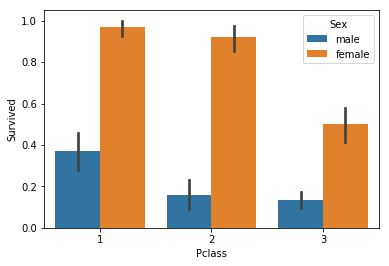

In [55]:
#survival by Pclass
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_data)
#sns.barplot(x="Pclass", y="Survived",  data=train_data)

#print percentage of people by Pclass that survived
print("Percentage of  men who survived in Pclass=1:", train_data["Survived"]
      [train_data["Pclass"] == 1][train_data['Sex']=='male'].value_counts(normalize = True)[1]*100)
print("Percentage of men who survived in Pclass=2:", train_data["Survived"]
      [train_data["Pclass"] == 2][train_data['Sex']=='male'].value_counts(normalize = True)[1]*100)
print("Percentage of men who survived in Pclass=3:", train_data["Survived"]
      [train_data["Pclass"] == 3][train_data['Sex']=='male'].value_counts(normalize = True)[1]*100)


#sns.barplot(x="Sex", y="Survived", data=train_data)
print("Percentage of rich women who survived:", train_data["Survived"]
      [train_data["Pclass"] == 1][train_data['Sex']=='female'].value_counts(normalize = True)[1]*100)

print("Percentage of rich women who survived:", train_data["Survived"]
      [train_data["Pclass"] == 2][train_data['Sex']=='female'].value_counts(normalize = True)[1]*100)

print("Percentage of rich women who survived:", train_data["Survived"]
      [train_data["Pclass"] == 3][train_data['Sex']=='female'].value_counts(normalize = True)[1]*100)


### Survivours Based on Age and Pclass

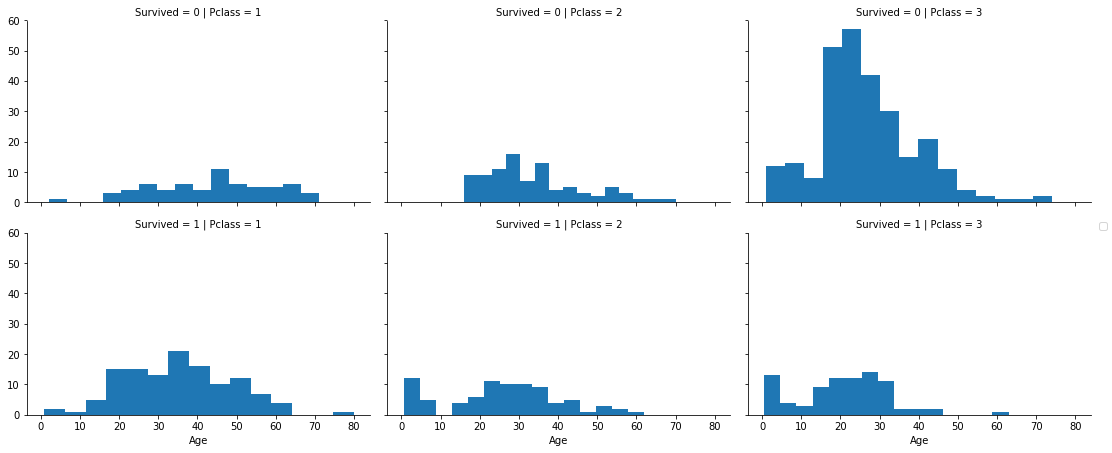

In [19]:
grid = sns.FacetGrid(train_data, col='Pclass', row='Survived', size=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1.0, bins=15)
grid.add_legend();


Most of the women who travelled in the Pclass '1' and '2' survived whereas poor women 50% of the poor women survived.
Women had more chance to survive than men.
Poor men had the least chance to survive

## Survivours based on embarked

Percentage of Embarked = 'S' who survived: 33.69565217391305
Percentage of Embarked = 'Q' who survived: 38.961038961038966
Percentage of Embarked = 'C' who survived: 55.35714285714286


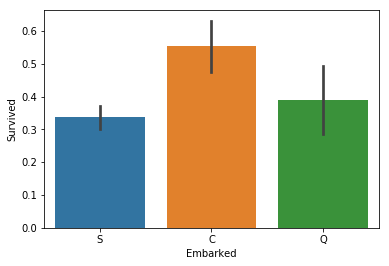

In [20]:
#survival based on the port the passengers embarked on
sns.barplot(x="Embarked", y="Survived", data=train_data)


print("Percentage of Embarked = 'S' who survived:", train_data["Survived"]
      [train_data["Embarked"] == 'S'].value_counts(normalize = True)[1]*100)

print("Percentage of Embarked = 'Q' who survived:", train_data["Survived"]
      [train_data["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100)

print("Percentage of Embarked = 'C' who survived:", train_data["Survived"]
      [train_data["Embarked"] == 'C'].value_counts(normalize = True)[1]*100)

In [21]:
Though most of the passengers embarked from Southhampton Port that is Embarked = 'S',they were the least survivours.
The passengers who embarked from chebourg i.e embarked = 'C' survived the most

SyntaxError: invalid syntax (<ipython-input-21-93ed6dd2bf5d>, line 1)

### Survivours based on siblings or spouse

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


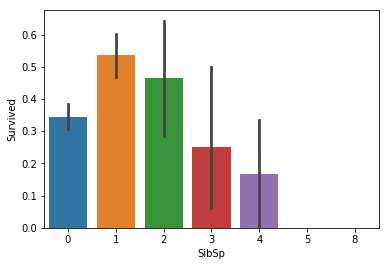

In [22]:

#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
print(train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

sns.barplot(x="SibSp", y="Survived", data=train_data)

The passengers who travelled alone or with their spouse and childernsurvived the most Whereas the passenger with more than 3 sibsp survived the least .


### Survivours based on Parch

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


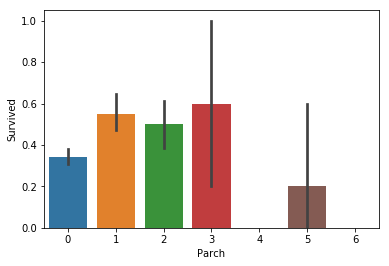

In [23]:
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
print(train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
 
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train_data)


### Surviours based on SibSp and Parch:

passengers travelled with family 1    537
0    354
Name: alone, dtype: int64
passengers travelled alone 1    537
0    354
Name: alone, dtype: int64


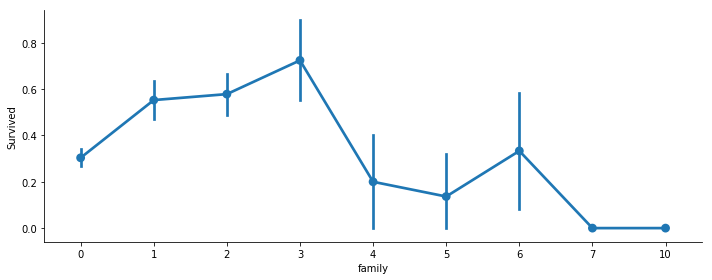

In [70]:

train_data['family'] =train_data['SibSp'] + train_data['Parch']
train_data.loc[train_data['family'] > 0, 'alone'] = 0
train_data.loc[train_data['family'] == 0, 'alone'] = 1
train_data['alone'] =train_data['alone'].astype(int)
#print(train_data['not_alone'])
##print("passengers travelled with family",train_data['alone'].value_counts())
print("passengers travelled alone",train_data['alone'].value_counts())
train_data['alone'].value_counts()

axes = sns.factorplot('family','Survived',data=train_data, aspect = 2.5, )
#axes = sns.factorplot('family','Survived',data=train_data )

#train_data['alone'].head(10)


Here we can see that one had a high probabilty of survival with 1 to 3 realitves, but a lower one if he/she  had less than 1 or more than 3 (except for some cases with 6 relatives).



## Cleaning

In [61]:
#train_data.info()

In [97]:
#Now we need to fill in the missing values in the some features
#train_df['Embarked'].describe()


southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print("Number of people embarking in Southampton (S):",southampton)

cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print("Number of people embarking in Cherbourg (C):",cherbourg)

queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print("Number of people embarking in Queenstown (Q):",queenstown)




Number of people embarking in Southampton (S): 646
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [98]:

#replacing the missing values in the Embarked feature with S
train_data = train_data.fillna({"Embarked": "S"})

# replacing the missing values in the feature 'Fare' with median of the Values in the Fare
train_data["Fare"]=train_data["Fare"].fillna(train_data["Fare"].dropna().median())
  # data["Age"]=data["Age"].fillna(data["Age"].dropna().median())
    
#replacing the missing values in the feature 'Age' with median of the Values in the Age

train_data["Age"]=train_data["Age"].fillna(train_data["Age"].dropna().median())
#train_data.info()


In [89]:
# Adding a new column called Title
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#train_data['Title']
pd.crosstab(train_data['Title'], train_data['Sex'])
#train_data.info()


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


    Title  Survived
0  Master        40
1    Miss       185
2      Mr       517
3     Mrs       126
4    Rare        21
5   Royal         2
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000


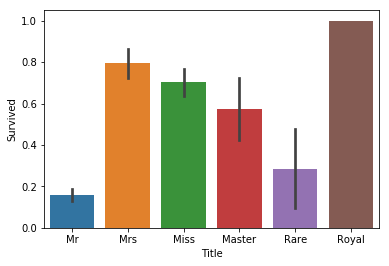

In [91]:
# replacing certain title names with rare, Mrs,Miss and royal
train_data['Title'] = train_data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
train_data['Title'] = train_data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train_data['Title'] = train_data['Title'].replace(['Mlle','Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

print(train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).count())
print(train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
sns.barplot(x = "Title", y = "Survived", data = train_data)


Royals or wealthy passenger had 100% and women have highest survival chance than other passengers

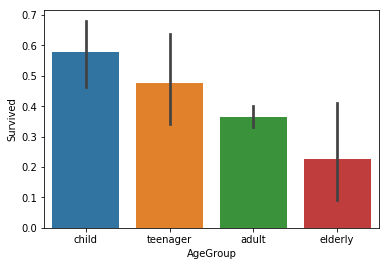

In [99]:
# Adding a new column called Agegruop
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train_data.Age, bins, labels = labels)
train_data['AgeGroup'] = age_groups
#train_data.info()

sns.barplot(x = "AgeGroup", y = "Survived", data = train_data)


The children and the teenager are more likely to survive than the elderly people who are over 60 years

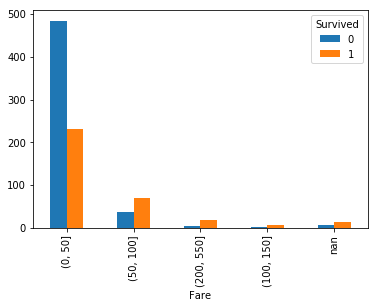

In [71]:
group = pd.cut(train_data.Fare, [0,50,100,150,200,550])
piv_fare = train_data.pivot_table(index=group, columns='Survived', values = 'Fare', aggfunc='count')
piv_fare.plot(kind='bar')